# <font color='blue'>Machine Learning</font>

# Regressão Linear Múltipla com Scikit-Learn

## Definindo o Problema de Negócio

Nosso objetivo é construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston. Para cada casa temos diversas variáveis explanatórias. Sendo assim, podemos resolver este problema empregando Regressão Linear Simples ou Múltipla.

## Definindo o Dataset 

Usaremos o Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo deste projeto é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## Análise Exploratória

In [12]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target
variables = dataset.columns[:-1]

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [5]:
valor_medio_esperado_na_previsao

22.532806324110698

In [8]:
# Imprimindo o desvio padrão via NumPy da variável RM
np.std(dataset['RM'])

0.7019225143345692

### Matriz de Correlação

In [9]:
X = dataset.iloc[:,:-1]
matriz_corr = X.corr()
print (matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [13]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

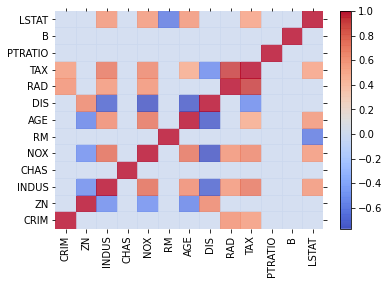

In [14]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

## Machine Learning

In [15]:
# Importando as funções
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = dataset[['LSTAT', 'RM', 'DIS', 'PTRATIO']]
y = dataset['target'].values

In [17]:
X.head()

,LSTAT,RM,DIS,PTRATIO
0,4.98,6.575,4.0900,15.3
1,9.14,6.421,4.9671,17.8
2,4.03,7.185,4.9671,17.8
3,2.94,6.998,6.0622,18.7
4,5.33,7.147,6.0622,18.7


In [18]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [19]:
# Cria o modelo
modelo = LinearRegression(normalize = False, fit_intercept = True)

In [20]:
# Treina o modelo
modelo_v2 = modelo.fit(X_train, y_train)

In [21]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, modelo_v2.fit(X_train, y_train).predict(X_test))

0.6347923449246609

In [22]:
# Produz a matriz com os novos dados de entrada para a previsão
LSTAT = 5
RM = 8
DIS = 6
PTRATIO = 19

# Lista com os valores das variáveis
dados_nova_casa = [LSTAT, RM, DIS, PTRATIO]

# Reshape
Xp = np.array(dados_nova_casa).reshape(1, -1)

# Previsão
print("Taxa Média de Ocupação Para a Casa:", modelo_v2.predict(Xp))

Taxa Média de Ocupação Para a Casa: [33.65282404]
